## Import Libraries

In [1]:
"""
!pip install ydata-profiling
!pip install sweetviz
"""

'\n!pip install ydata-profiling\n!pip install sweetviz\n'

In [2]:
"""
from ydata_profiling import ProfileReport
import sweetviz as sv
import plotly.express as px
#from google.colab import files
"""

'\nfrom ydata_profiling import ProfileReport\nimport sweetviz as sv\nimport plotly.express as px\n#from google.colab import files\n'

In [3]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

## Load the Data

In [101]:
FootBallPlayers = pd.read_csv("final_data.csv")

In [102]:
FootBallPlayers.shape

(10754, 22)

In [103]:
FootBallPlayers.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [104]:
FootBallPlayers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [105]:
FootBallPlayers.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [106]:
FootBallPlayers.describe(exclude='number')

,player,team,name,position
count,10754,10754,10754,10754
unique,10754,374,10584,16
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back
freq,1,46,6,1821


In [107]:
"""
profile_FootBallPlayers = ProfileReport(FootBallPlayers, title="Profiling Report")
profile_FootBallPlayers.to_file("FootBallPlayers_report.html")
from google.colab import files
files.download('FootBallPlayers_report.html')
profile_FootBallPlayers
"""

'\nprofile_FootBallPlayers = ProfileReport(FootBallPlayers, title="Profiling Report")\nprofile_FootBallPlayers.to_file("FootBallPlayers_report.html")\nfrom google.colab import files\nfiles.download(\'FootBallPlayers_report.html\')\nprofile_FootBallPlayers\n'

In [108]:
"""
vis_report_FootBallPlayers = sv.analyze(FootBallPlayers)
vis_report_FootBallPlayers.show_html("vis_report_FootBallPlayers.html") # Default arguments will generate to "SWEETVIZ_REPORT.html"
from google.colab import files
files.download('vis_report_FootBallPlayers.html')
vis_report_FootBallPlayers.show_notebook()
"""

'\nvis_report_FootBallPlayers = sv.analyze(FootBallPlayers)\nvis_report_FootBallPlayers.show_html("vis_report_FootBallPlayers.html") # Default arguments will generate to "SWEETVIZ_REPORT.html"\nfrom google.colab import files\nfiles.download(\'vis_report_FootBallPlayers.html\')\nvis_report_FootBallPlayers.show_notebook()\n'

In [109]:
# uniqeness
FootBallPlayers[FootBallPlayers.duplicated()]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [110]:
# uniqeness
FootBallPlayers.drop_duplicates(inplace=True)
FootBallPlayers[FootBallPlayers.duplicated()]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [111]:
# Completeness
FootBallPlayers.isnull().sum()

,0
player,0
team,0
name,0
position,0
height,0
age,0
appearance,0
goals,0
assists,0
yellow cards,0


In [112]:
#Completeness
FootBallPlayers['name'].value_counts()

,count
name,
Paulinho,6
Vitinho,5
Guilherme,5
Fernando,4
João Pedro,4
...,...
Everson,1
Matheus Mendes,1
Gabriel Delfim,1


In [113]:
FootBallPlayers[FootBallPlayers['name'] =='Paulinho']

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
3259,/paulinho/profil/spieler/1083888,Clube de Regatas Vasco da Gama,Paulinho,Defender Right-Back,172.0,18.0,0,0.000000,0.000000,0.000000,...,0.0,0.0,0,0,0,0,500000,500000,2,1
3628,/paulinho/profil/spieler/428791,Clube Atlético Mineiro,Paulinho,Attack-LeftWinger,177.0,22.0,47,0.287540,0.107827,0.071885,...,0.0,0.0,2504,458,55,2,7500000,25000000,4,1
3786,/paulinho/profil/spieler/57229,Sport Club Corinthians Paulista,Paulinho,midfield-CentralMidfield,183.0,34.0,8,0.450000,0.000000,0.225000,...,0.0,0.0,400,276,57,15,1200000,40000000,3,0
4016,/paulinho/profil/spieler/85771,CS Marítimo,Paulinho,Defender Right-Back,176.0,31.0,49,0.047468,0.071203,0.213608,...,0.0,0.0,3792,21,2,1,300000,1500000,2,1
4276,/paulinho/profil/spieler/211072,Sporting CP,Paulinho,Attack Centre-Forward,187.0,30.0,84,0.431334,0.297471,0.267724,...,0.0,0.0,6051,199,36,7,8000000,15000000,4,0
9139,/paulinho/profil/spieler/534473,Al-Fayha FC,Paulinho,midfield-CentralMidfield,175.0,26.0,60,0.147996,0.092497,0.277492,...,0.0,0.0,4865,0,0,0,1000000,1600000,3,0


In [114]:
# Accurecy - types
FootBallPlayers.dtypes

,0
player,object
team,object
name,object
position,object
height,float64
age,float64
appearance,int64
goals,float64
assists,float64
yellow cards,float64


In [115]:
# Accurecy - Outlier

categorical_features = ['player', 'team', 'name', 'position']

numeric_features = ['height', 'age', 'appearance', 'goals','assists','goals conceded','minutes played','days_injured','games_injured','award','current_value','highest_value','position_encoded']
numeric_features2 = ['height', 'age', 'appearance', 'goals','assists','goals conceded','minutes played','days_injured','games_injured','award','highest_value']

In [116]:
df=FootBallPlayers.copy()

In [117]:
df.shape

(10754, 22)

In [118]:
x_df=df[numeric_features]
x_df.drop('current_value', axis=1, inplace=True)
y_df=df['current_value']

In [119]:
x_arr = np.array(x_df)
y_arr = np.array(y_df)
#Real_Values


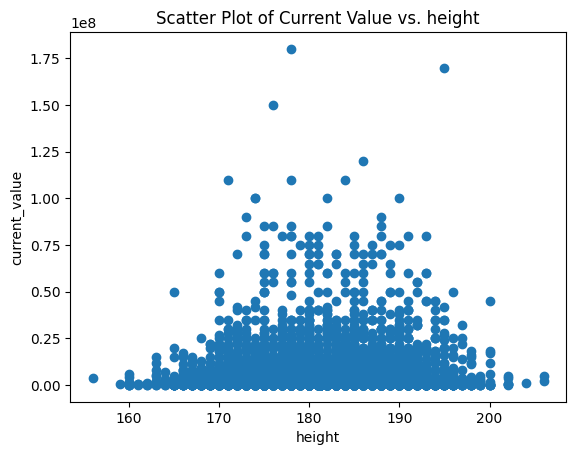

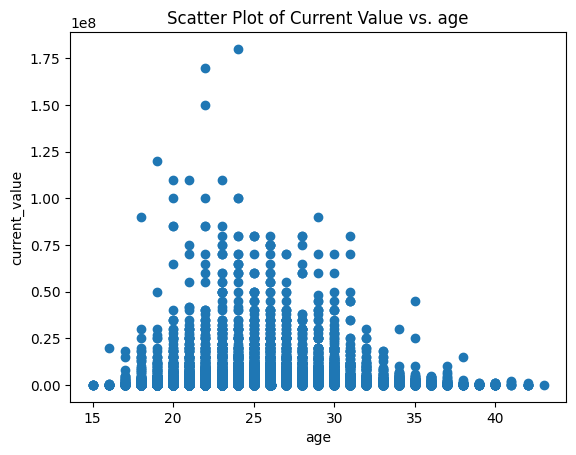

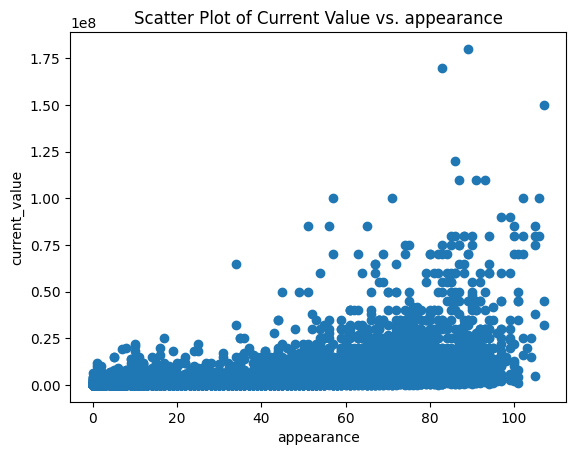

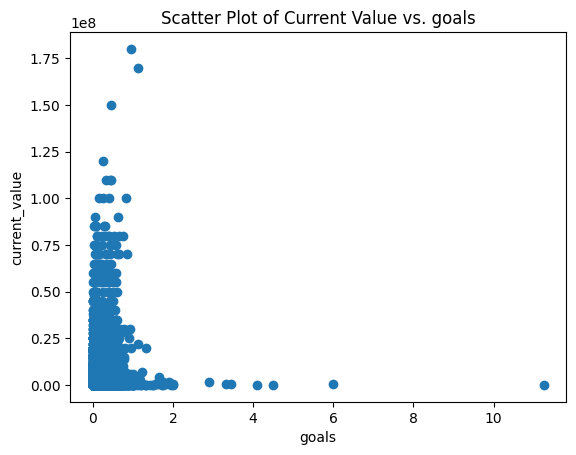

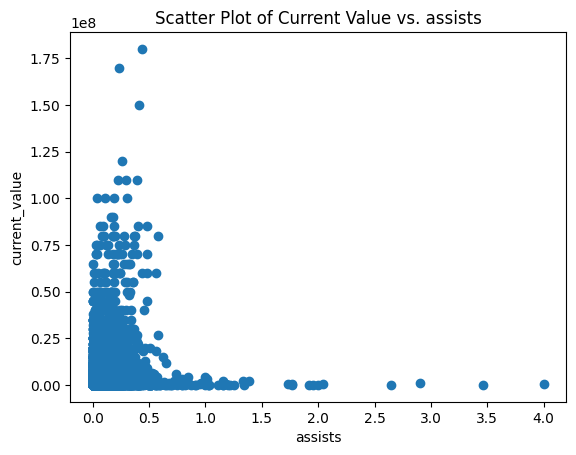

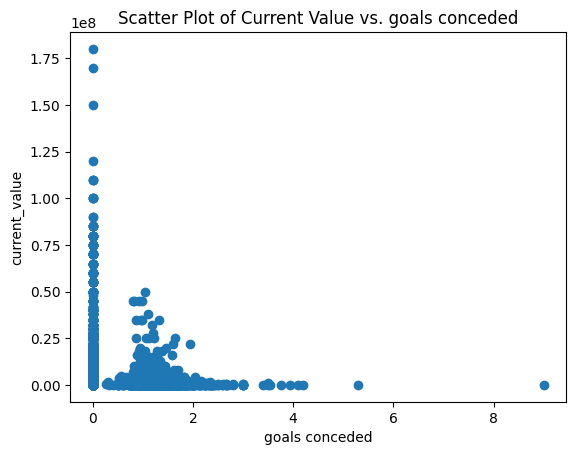

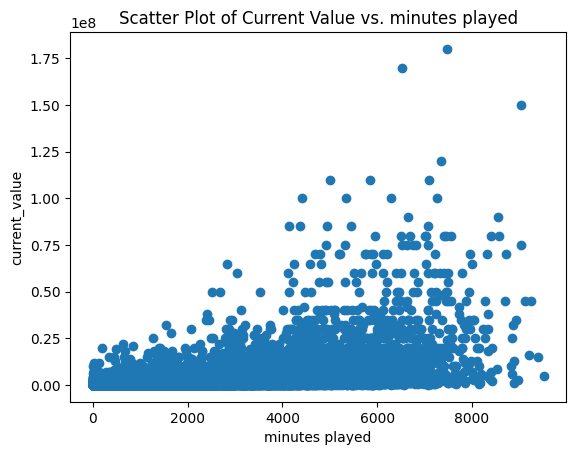

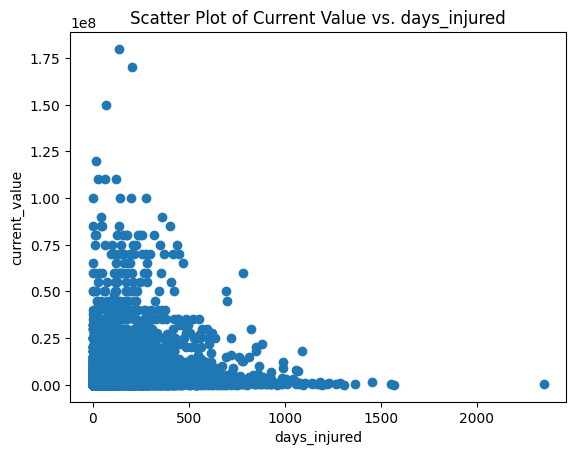

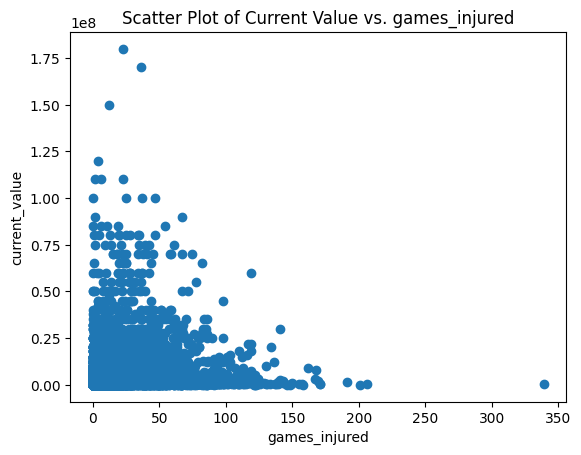

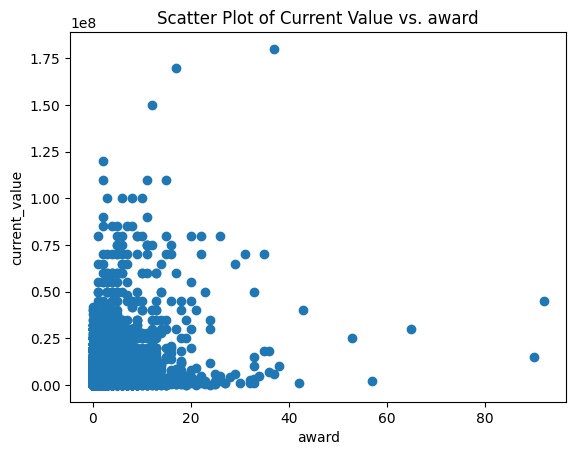

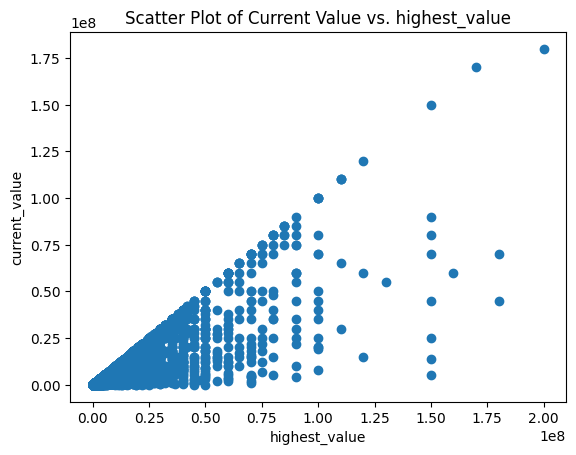

In [120]:

feature_index = 0
for feature_index in range(len(numeric_features2)):
  x_arr_for_scatter = x_arr[:, feature_index]  # Select the desired feature
  # Now create the scatter plot
  plt.scatter(x_arr[:,feature_index], y_arr)
  plt.xlabel(numeric_features2[feature_index])  # Label the x-axis with the feature name
  plt.ylabel('current_value')
  plt.title('Scatter Plot of Current Value vs. ' + numeric_features2[feature_index])
  plt.show()

In [121]:
df=df[df['current_value']<=100000000]
df=df[df['current_value']>0]

In [122]:
df=df[df['goals']<=1]


In [123]:
df=df[df['assists']<=0.8]

In [124]:
df=df[df['days_injured']<=1200]

In [125]:
df=df[df['award']<=50]

In [126]:
df=df[df['goals conceded']<=5]

In [127]:
x_df.shape, y_df.shape

((10754, 12), (10754,))

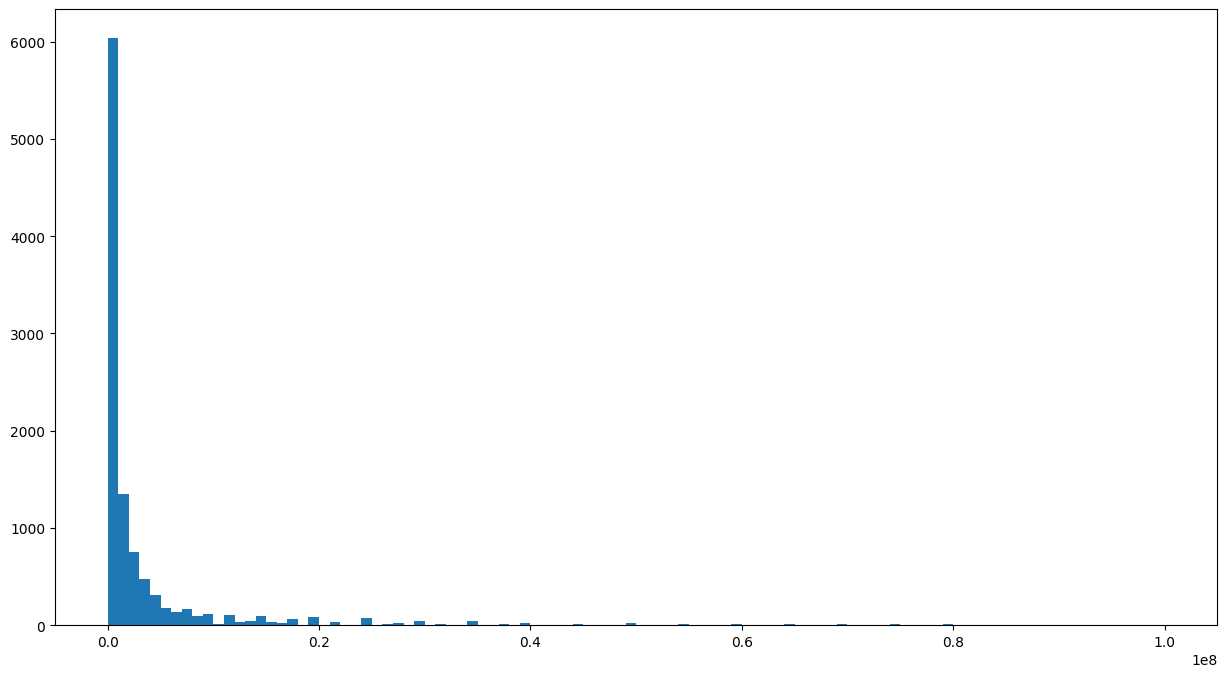

In [128]:
plt.figure(figsize=(15,8))
plt.hist(df['current_value'], bins=100);


In [129]:
df.shape

(10476, 22)

#### 3. Feature selection

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [130]:
# Create a label encoder object
#label_encoder = LabelEncoder()

# Fit and transform the 'name' column
#df['name_encoded'] = label_encoder.fit_transform(df['name'])

# Display the first few rows
#df[['name', 'name_encoded']].head()
#scaler = StandardScaler()

In [131]:
df.shape

(10476, 22)

In [132]:
# Calculate the 35th and 75th percentiles of the price
p35 = df['current_value'].quantile(0.35)
p75 = df['current_value'].quantile(0.75)

# Function to categorize prices
def categorize_price(price):
    if price < p35:
        return 'Cheap_Price'
    elif price < p75:
        return 'Good_Price'
    else:
        return 'High_Price'

In [133]:
p35, p75

(450000.0, 3000000.0)

In [134]:


# Apply the function to create a new column
df['player_price_category'] = df['current_value'].apply(categorize_price)


df.drop('current_value', axis=1, inplace=True)
# Verify the distribution of the new categories
print(df['player_price_category'].value_counts())

player_price_category
Good_Price     4272
Cheap_Price    3535
High_Price     2669
Name: count, dtype: int64


In [135]:
numeric_features

['height',
 'age',
 'appearance',
 'goals',
 'assists',
 'goals conceded',
 'minutes played',
 'days_injured',
 'games_injured',
 'award',
 'current_value',
 'highest_value',
 'position_encoded']

In [136]:

encoder = LabelEncoder()
df['player_price_category_encoded'] = encoder.fit_transform(df['player_price_category'])

In [137]:
df['player_price_category_encoded'].value_counts()

,count
player_price_category_encoded,
1,4272
0,3535
2,2669


In [138]:
numeric_features.append('player_price_category_encoded')
numeric_features.remove('current_value')

In [139]:
df=df[numeric_features]

In [140]:
correlation = df.corr()
print(correlation['player_price_category_encoded'].sort_values(ascending=False))

player_price_category_encoded    1.000000
appearance                       0.538943
minutes played                   0.512022
highest_value                    0.499737
award                            0.250323
assists                          0.242346
games_injured                    0.233888
days_injured                     0.202276
goals                            0.193027
position_encoded                 0.137567
height                           0.020586
age                              0.004729
goals conceded                  -0.132275
Name: player_price_category_encoded, dtype: float64


In [141]:
# Set the correlation threshold
threshold = 0.1  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['player_price_category_encoded']) > threshold]['player_price_category_encoded'].index
selected_features.to_list()

['appearance',
 'goals',
 'assists',
 'goals conceded',
 'minutes played',
 'days_injured',
 'games_injured',
 'award',
 'highest_value',
 'position_encoded',
 'player_price_category_encoded']

In [142]:
selected_features.size, type(selected_features)

(11, pandas.core.indexes.base.Index)

In [143]:
df = df[selected_features]
df.head()

,appearance,goals,assists,goals conceded,minutes played,days_injured,games_injured,award,highest_value,position_encoded,player_price_category_encoded
0,104,0.000000,0.000000,1.217252,9390,42,5,13,70000000,1,2
1,15,0.000000,0.000000,1.242331,1304,510,58,1,22000000,1,1
2,4,0.000000,0.000000,0.616438,292,697,84,4,6000000,1,1
3,82,0.028090,0.056180,0.000000,6408,175,22,9,50000000,2,2
4,63,0.017889,0.017889,0.000000,5031,238,51,21,80000000,2,2


In [144]:
df.shape

(10476, 11)

In [145]:
# one hot coding
#df = pd.get_dummies(df, columns=categorical_features)

#### 4. Prepare train and test data

In [146]:
# Prepare data
X = df.drop(['player_price_category_encoded'], axis=1)
y = df['player_price_category_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [147]:
X.shape

(10476, 10)

## Buliding the Model

In [148]:

model = LogisticRegression()

## Train the Model

In [149]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LogisticRegression()

## Test the Model

In [150]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

In [151]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Interpretation of the Model

In [152]:
# Each row of the model.coef_ matrix tells you how each feature affects being in the corresponding class versus any other class
coeff_df = pd.DataFrame(model.coef_[2],X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
appearance,-0.087454
goals,0.136263
assists,0.115575
goals conceded,-0.214198
minutes played,0.630315
days_injured,0.002158
games_injured,-0.185452
award,-0.455206
highest_value,5.122118
position_encoded,-0.047229


In [153]:
model.coef_

array([[ 1.34795651e-01, -6.69106906e-02, -1.42122081e-01,
         1.65306819e-01, -7.44114297e-01,  2.40279693e-02,
         5.89151103e-02,  3.15948525e-01, -6.69872554e+00,
        -5.50665804e-02],
       [-4.73411900e-02, -6.93522058e-02,  2.65466555e-02,
         4.88913194e-02,  1.13799000e-01, -2.61863143e-02,
         1.26537111e-01,  1.39257968e-01,  1.57660718e+00,
         1.02295602e-01],
       [-8.74544606e-02,  1.36262896e-01,  1.15575426e-01,
        -2.14198139e-01,  6.30315297e-01,  2.15834505e-03,
        -1.85452221e-01, -4.55206492e-01,  5.12211837e+00,
        -4.72290215e-02]])

In [154]:
print(model.intercept_)

[-2.06407024  1.37355582  0.69051442]


## Evaluating the Model

In [155]:
# our benchmark model
base_model = round(df['player_price_category_encoded'].value_counts()[1]/df.shape[0]*100, 2)
base_model

40.78

### 1. Accuracy

In [156]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7223282442748091

In [157]:
y_pred_train = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.7029832935560859

In [158]:

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[578, 130,   6],
       [223, 580,  46],
       [  0, 177, 356]])

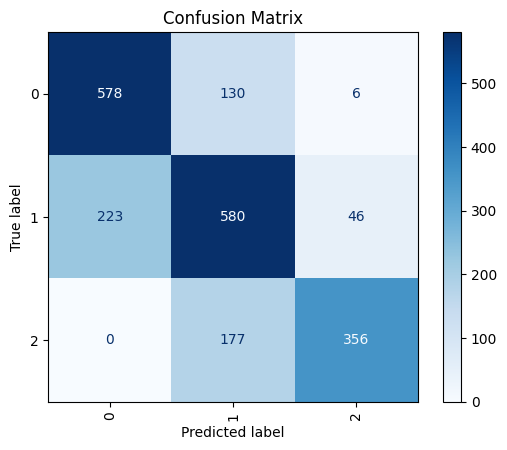

In [159]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [160]:
# Calculate Precision
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.75


In [161]:
# Calculate Recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.72


In [162]:

# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.73
